In [2]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

con = sqlite3.connect('socialmedia.sqlt.db')
cur = con.cursor()

'''3. პრინტავს თითოეულ ჩანაწერს ბაზიდან, სადაც ქვეყანა=საქართველოა '''
cur.execute("SELECT * FROM Students WHERE Country='Georgia'")
result = cur.fetchall()
for row in result:
    print(row)


(1, 18, 'Male', 'High School', 'Georgia', 8.0, 'Instagram', 'Yes', 8.0, 9, 'Single', 2, 6)
(81, 21, 'Male', 'Graduate', 'Georgia', 3.0, 'LinkedIn', 'No', 7.1, 8, 'In Relationship', 1, 4)
(707, 18, 'Female', 'Undergraduate', 'Georgia', 6.0, 'TikTok', 'Yes', 7.0, 7, 'Single', 0, 8)
(707, 18, 'Female', 'Undergraduate', 'Georgia', 8.0, 'TikTok', 'Yes', 8.0, 8, 'Single', 0, 9)


In [3]:

'''სტუდენტების რაოდენობა'''
def gender_count(gender):
    return cur.execute('SELECT count(*) FROM Students WHERE Gender=:a',{'a':gender}).fetchone()[0]

male_count = gender_count('Male')
female_count = gender_count('Female')
students_count = male_count + female_count
print(male_count)
print(female_count)


353
354


In [4]:
'''3. პრინტავს თითოეულ ჩანაწერს ბაზიდან, სადაც ქვეყანა=საქართველოა '''
cur.execute("SELECT * FROM Students WHERE Country='Georgia'")
result = cur.fetchall()
for row in result:
    print(row)


(1, 18, 'Male', 'High School', 'Georgia', 8.0, 'Instagram', 'Yes', 8.0, 9, 'Single', 2, 6)
(81, 21, 'Male', 'Graduate', 'Georgia', 3.0, 'LinkedIn', 'No', 7.1, 8, 'In Relationship', 1, 4)
(707, 18, 'Female', 'Undergraduate', 'Georgia', 6.0, 'TikTok', 'Yes', 7.0, 7, 'Single', 0, 8)
(707, 18, 'Female', 'Undergraduate', 'Georgia', 8.0, 'TikTok', 'Yes', 8.0, 8, 'Single', 0, 9)


In [19]:
'''
4.ცხრილში ახალი მონაცემების შეტანა input-ით
'''
def insert_input():
    student_id = students_count + 1
    age = int(input("Enter Age: "))
    gender = input("Enter Gender: ")
    academic_level = input("Enter Academic Level: ")
    country = input("Enter Country: ")
    avg_hours = float(input("Enter Avg_Daily_Usage_Hours: "))
    used_platform = input("Enter Your Most Used Platform: ")
    affects_studies = input("Does Social Media Affect Your Academic Performance (Yes/No): ")
    sleep_hours = float(input("Enter How Many Hours Of Sleep You Get: "))
    mental_score = int(input("Enter Mental Health Score: "))
    relationship = input("Enter Relationship Status: ")
    conflicts = int(input("Enter Number of Conflicts Over Social Media: "))
    addiction = int(input("Enter Addiction Score: "))

    cur.execute("INSERT INTO Students (Student_ID, Age, Gender, Academic_Level, Country,"
                "Avg_Daily_Usage_Hours, Most_Used_Platform,Affects_Academic_Performance, Sleep_Hours_Per_Night, Mental_Health_Score, Relationship_Status,"
                "Conflicts_Over_Social_Media, Addicted_Score) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)",(student_id,age,gender,academic_level, country,avg_hours,
                used_platform,affects_studies, sleep_hours,mental_score,relationship,conflicts,addiction))

    con.commit()

insert_input()


Enter Age:  18
Enter Gender:  Female
Enter Academic Level:  Undergraduate
Enter Country:  Georgia
Enter Avg_Daily_Usage_Hours:  8
Enter Your Most Used Platform:  TikTok
Does Social Media Affect Your Academic Performance (Yes/No):  Yes
Enter How Many Hours Of Sleep You Get:  8
Enter Mental Health Score:  8
Enter Relationship Status:  Single
Enter Number of Conflicts Over Social Media:  0
Enter Addiction Score:  9


In [5]:

'''5. მონაცემების შეცვლა'''
student_id = input("შეიყვანე Student_ID, რომლის მონაცემების განახლება გინდა: ")
print("განაახლეთ მონაცემები ამ სტუდენტზე.")
age = input("age: ")
gender = input("gender: ")
level = input("academic level: ")
country = input("country: ")
usage = input("average daily usage in hours: ")
platform = input("most used platformა: ")
impact = input("affects academic performance? (Y/N): ")
sleep = input("sleep hours: ")
mental = input("mental health score: ")
relationship = input("relationship status: ")
conflict = input("conflicts over social media (numbers): ")
addiction = input("Adddicted Score: ")

cur.execute("""
    UPDATE Students
    SET Age = ?, Gender = ?, Academic_Level = ?, Country = ?, Avg_Daily_Usage_Hours = ?,
        Most_Used_Platform = ?, Affects_Academic_Performance = ?, Sleep_Hours_Per_Night = ?, Mental_Health_Score = ?,
        Relationship_Status = ?, Conflicts_Over_Social_Media = ?, Addicted_Score = ?
    WHERE Student_ID = ?
""", (age, gender, level, country, usage, platform, impact, sleep, mental,
      relationship, conflict, addiction, student_id))

con.commit()

print(f"Student_ID {student_id}-ის მონაცემები განახლდა.")


შეიყვანე Student_ID, რომლის მონაცემების განახლება გინდა:  1


განაახლეთ მონაცემები ამ სტუდენტზე.


age:  18
gender:  Male
academic level:  High School
country:  Georgia
average daily usage in hours:  8
most used platformა:  Instagram
affects academic performance? (Y/N):  Yes
sleep hours:  8
mental health score:  9
relationship status:  Single
conflicts over social media (numbers):  2
Adddicted Score:  6


Student_ID 1-ის მონაცემები განახლდა.


In [8]:

'''6.სტუდენტის მონაცემების ამოშლა ID-ის მიხედვით'''

student_id = input("შეიყვანეთ Student_ID, რომლის ჩანაწერის წაშლა გსურთ: ")

cur.execute("DELETE FROM Students WHERE Student_ID = ?", (student_id,))

con.commit()

print(f"Student_ID {student_id}-ის ჩანაწერი წაიშალა წარმატებით.")



შეიყვანეთ Student_ID, რომლის ჩანაწერის წაშლა გსურთ:  706


Student_ID 706-ის ჩანაწერი წაიშალა წარმატებით.


454
252


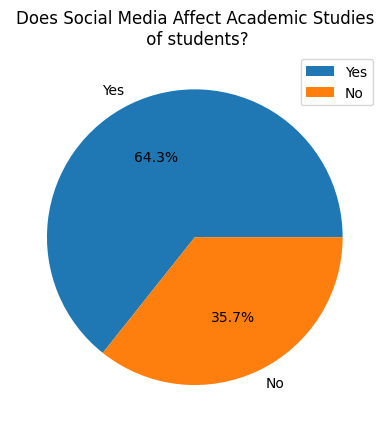

In [9]:
#3
'''
ხელს უშლის თუ არა სოციალური მედია სტუდენტი აკადემიურ მოსწრებას
'''
def affects_academic(gender):
    return cur.execute('SELECT count(*) FROM Students WHERE Gender=:a and Affects_Academic_Performance=:b',{'a':gender,"b":"Yes"}).fetchone()[0]
def doesnt_Affects_Academic(gender):
    return cur.execute("SELECT count(*) FROM Students WHERE Gender=:a AND Affects_Academic_Performance=:b",{'a':gender,"b":"No"}).fetchone()[0]

female_yes = affects_academic('Female')
male_yes = affects_academic('Male')
female_no = doesnt_Affects_Academic('Female')
male_no = doesnt_Affects_Academic('Male')
affects = female_yes + male_yes
not_affects = male_no + female_no
print(affects)
print(not_affects)

#3matplotlib-ის გამოყენება
labels = ['Yes', "No" ]
sizes = [affects, not_affects]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

ax.legend(loc='best',)
ax.set_title("Does Social Media Affect Academic Studies\n of students?")
plt.show()



{'Instagram': 249, 'Twitter': 30, 'TikTok': 155, 'YouTube': 10, 'Facebook': 123, 'LinkedIn': 21, 'Snapchat': 13, 'LINE': 12, 'KakaoTalk': 12, 'VKontakte': 12, 'WhatsApp': 54, 'WeChat': 15}


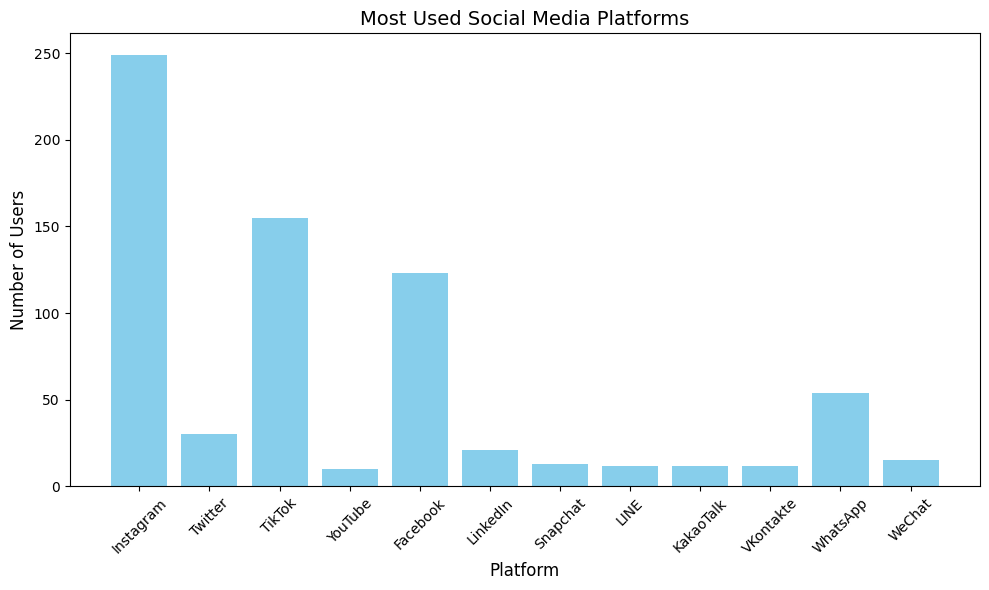

In [10]:

'''
ბაზაში არსებული პლატფორმები
'''
cur.execute("SELECT DISTINCT Most_Used_Platform FROM students")
platforms = [row[0] for row in cur.fetchall()]

'''რამდენს უწერია თითოეული პლატფორმა'''
platforms_values = {}
for each in platforms:
    cur.execute("SELECT COUNT(*) FROM students WHERE Most_Used_Platform = ?", (each,))
    count = cur.fetchone()[0]
    platforms_values[each] = count
print(platforms_values)
count = 0

# პლათფორმა და რაოდენობა
platforms = list(platforms_values.keys())
counts = list(platforms_values.values())

''' ბარის დიაგრამა
 სტუდენტების მიერ ყველაზე ხშირად გამოყენებული სოციალური პლატფორმის მიხედვით '''
plt.figure(figsize=(10, 6))
plt.bar(platforms, counts, color='skyblue')

plt.title('Most Used Social Media Platforms', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

7.764705882352941 6.6419753086419755 6.4787878787878785 6.589743589743589 6.095238095238095 5.676470588235294 6.115384615384615


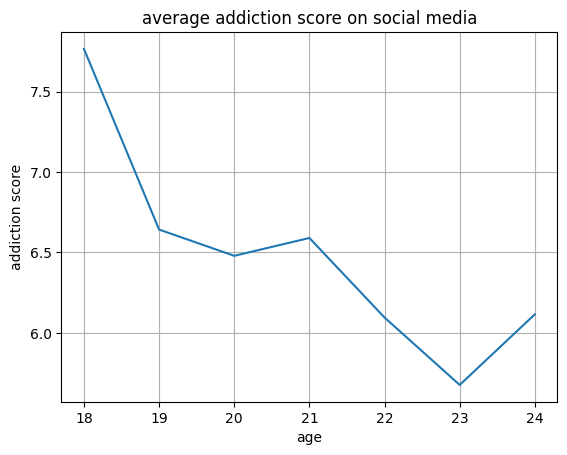

In [27]:

'''ხაზოვანი დიაგრამა სოციალურ მედიაზე დამოკიდებულება ასაკის მიხედვით'''
cur.execute("SELECT Age, Addicted_Score FROM Students ORDER BY Age")
data = cur.fetchall()

# print(data)
#აქ თითოეულ ასაკზე გამოვთვლი სოციალურ მედიაზე დამოკიდებულების საშუალოს
avg18, avg19, avg20, avg21, avg22, avg23, avg24 = 0, 0, 0, 0, 0, 0, 0
count18, count19, count20, count21, count22, count23, count24 = 0, 0, 0, 0, 0, 0, 0
for each in data:
    if each[0] == 18:
        count18 += 1
        avg18 += each[1]
    elif each[0] == 19:
        count19 += 1
        avg19 += each[1]
    elif each[0] == 20:
        count20 += 1
        avg20 += each[1]
    elif each[0] == 21:
        count21 += 1
        avg21 += each[1]
    elif each[0] == 22:
        count22 += 1
        avg22 += each[1]
    elif each[0] == 23:
        count23 += 1
        avg23 += each[1]
    elif each[0] == 24:
        count24 += 1
        avg24 += each[1]
avg18 /= count18
avg19 /= count19
avg20 /= count20
avg21 /= count21
avg22 /= count22
avg23 /= count23
avg24 /= count24
print(avg18, avg19, avg20, avg21, avg22, avg23, avg24)

#xazovani diagrama
t = np.arange(18,25)
s = avg18, avg19, avg20, avg21, avg22, avg23, avg24

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='age', ylabel='addiction score',
       title='average addiction score on social media')
ax.grid()

fig.savefig("test.png")
plt.show()




con.commit()

In [5]:
con.close()